In [48]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [49]:
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

In [50]:
file_path = "Data/firestore_ai_training_data_20250324_173442.csv"
game_data = pd.read_csv(file_path) #data as .csv file?


game_data['newDifficulty'] = game_data['newDifficulty'] - game_data['currentDifficulty']

In [51]:
game_data

,currentDifficulty,currentPlayerLives,id,levelsBeat,newDifficulty,playerLifeTimer,totalEnemiesKilled,totalPoints
0,2,0,0EbSXFZTryuq8oIfT5XD,2,0,29.496090,4,500
1,2,3,0MHiDsJMOXccolv2iGBX,2,0,20.071680,3,500
2,1,3,0fNyt4XAYVfxmrqhzHiS,2,0,21.088810,3,300
3,9,0,166Ds8AdrIlJM4pJwq2l,2,1,12.886800,0,0
4,1,2,1FQeoJPdbjvdXsvMIHHX,3,0,29.910000,4,400
...,...,...,...,...,...,...,...,...
453,8,2,zjKGbmNvnMzEw0dGT1TZ,7,1,49.470540,5,46400
454,1,3,zkDzIKcMEvhhYJkCtJy4,1,1,8.352791,1,100
455,1,0,zsZZHTI3xXZhscaJ39cC,1,0,43.373280,1,100
456,4,0,ztMqf7s3RfKt9f9j7zPK,2,1,45.579180,1,800


## Data Preprocesing

([<matplotlib.patches.Wedge at 0x1a8ccdb59d0>,
 [Text(0.4122226825762108, 1.0198394285227812, '0'),
  Text(-0.9224006513933636, 0.5993138062059798, '-1'),
  Text(-0.20997220036499176, -1.0797738999780853, '1')])

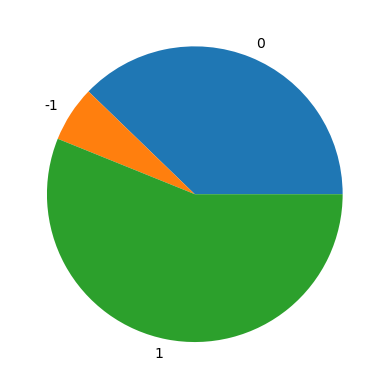

In [52]:
import matplotlib.pyplot as plt
same_difficulty_data = game_data[game_data.newDifficulty.eq(0)]
lower_difficulty_data = game_data[game_data.newDifficulty.eq(-1)]
increase_difficulty_data = game_data[game_data.newDifficulty.eq(1)]

fig, ax = plt.subplots()
ax.pie([len(same_difficulty_data), len(lower_difficulty_data), len(increase_difficulty_data)], labels=['0', '-1', '1'])

In [53]:
game_data.columns

Index(['currentDifficulty', 'currentPlayerLives', 'id', 'levelsBeat',
       'newDifficulty', 'playerLifeTimer', 'totalEnemiesKilled',
       'totalPoints'],
      dtype='object')

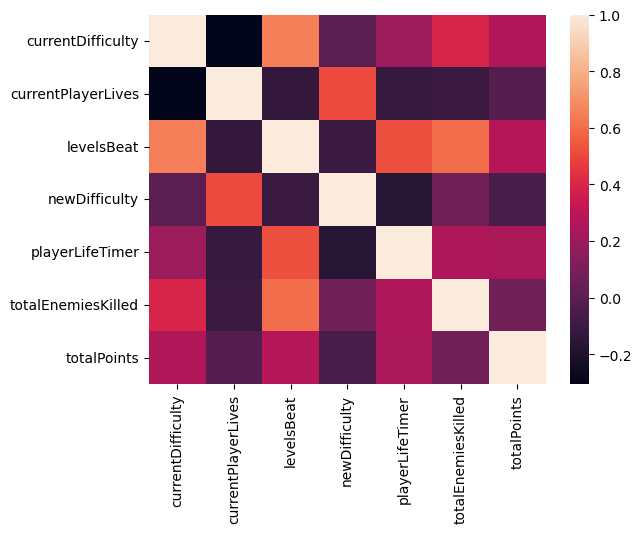

In [54]:
import seaborn as sb

columns_drop_name = ['id']

game_data_copy = game_data.drop(columns_drop_name, axis='columns')

heatmap = sb.heatmap(game_data_copy.corr())

In [55]:
column_drop_name = 'newDifficulty'
columns_drop_name = ['newDifficulty', 'id', 'totalPoints', 'playerLifeTimer']

x = game_data.drop(columns_drop_name, axis='columns')

y = pd.DataFrame()
y['Result'] = game_data[column_drop_name]

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 101)
x, y = smote.fit_resample(x, y)

([<matplotlib.patches.Wedge at 0x1a8cce9d460>,
 [Text(0.5499999702695115, 0.9526279613277875, '0'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '-1'),
  Text(0.5500001486524352, -0.9526278583383436, '1')])

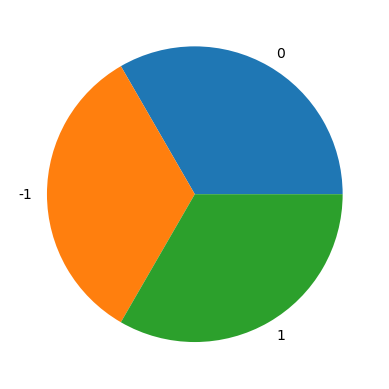

In [56]:
same_difficulty_data = y[y.Result.eq(0)]
lower_difficulty_data = y[y.Result.eq(-1)]
increase_difficulty_data = y[y.Result.eq(1)]

fig, ax = plt.subplots()
ax.pie([len(same_difficulty_data), len(lower_difficulty_data), len(increase_difficulty_data)], labels=['0', '-1', '1'])

In [57]:
#split data into training and testing data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [58]:
X_train

,currentDifficulty,currentPlayerLives,levelsBeat,totalEnemiesKilled
488,2,0,1,0
537,2,0,1,1
665,4,0,3,8
425,1,3,1,1
653,5,0,4,13
...,...,...,...,...
539,5,0,4,13
84,2,1,3,7
118,6,0,2,1
516,4,0,3,8


In [59]:
y_train

,Result
488,-1
537,-1
665,-1
425,1
653,-1
...,...
539,-1
84,0
118,-1
516,-1


In [60]:
X_test

,currentDifficulty,currentPlayerLives,levelsBeat,totalEnemiesKilled
291,2,0,1,2
211,3,1,5,12
410,5,0,2,1
494,3,0,3,7
753,1,0,2,4
...,...,...,...,...
336,4,0,6,2
411,1,3,1,1
701,1,0,2,1
624,4,0,2,3


In [61]:
y_test

,Result
291,-1
211,1
410,1
494,-1
753,0
...,...
336,0
411,1
701,0
624,-1


## AI Model Training

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train['Result'])

DecisionTreeClassifier()

## Testing Model Accuracy + Other Metrics

In [63]:
X_test

,currentDifficulty,currentPlayerLives,levelsBeat,totalEnemiesKilled
291,2,0,1,2
211,3,1,5,12
410,5,0,2,1
494,3,0,3,7
753,1,0,2,4
...,...,...,...,...
336,4,0,6,2
411,1,3,1,1
701,1,0,2,1
624,4,0,2,3


In [64]:
y_predict = dt.predict(X_test)

In [65]:
y_predict

array([-1,  0, -1, -1,  0,  0, -1, -1, -1, -1,  1,  0,  1,  0,  1, -1,  1,
       -1, -1,  0,  1,  0,  1, -1,  1,  0,  1,  1, -1,  1, -1,  0, -1,  1,
        0,  0,  1,  1, -1,  1,  1,  1, -1,  1,  0, -1,  0,  1, -1,  1, -1,
        1,  0,  0,  1, -1,  1, -1, -1,  1,  0,  1, -1,  1, -1, -1,  0, -1,
        1, -1,  0, -1,  0,  1, -1,  1,  1,  1,  0,  1,  1, -1,  1,  1, -1,
        1, -1,  1, -1,  0,  0, -1, -1,  0, -1,  0,  0,  1,  0, -1,  1,  0,
        0,  1,  0,  1, -1,  0,  0,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1, -1,  0,  1, -1,  1, -1,
        0,  0,  1,  0,  1,  1,  0,  0, -1,  1, -1, -1,  1,  1, -1,  1,  0,
       -1,  0], dtype=int64)

In [66]:
sklearn.metrics.accuracy_score(y_test, y_predict)

0.8193548387096774

In [67]:
sklearn.metrics.precision_recall_fscore_support(y_test, y_predict) #might need to add average = 'macro'

(array([0.83018868, 0.84090909, 0.79310345]),
 array([0.97777778, 0.71153846, 0.79310345]),
 array([0.89795918, 0.77083333, 0.79310345]),
 array([45, 52, 58], dtype=int64))

In [68]:
## Saving Model Weights

In [69]:
from joblib import dump, load
dump(dt, 'difficultyaimodelweights.joblib')
dt = load('difficultyaimodelweights.joblib')

In [71]:
X_test_2 = pd.DataFrame()
X_test_2['currentDifficulty'] = [1]
X_test_2['currentPlayerLives'] = [0]
X_test_2['levelsBeat'] = [1]
X_test_2['totalEnemiesKilled'] = [0]
y_predict_2 = dt.predict(X_test_2)
y_predict_2

array([0], dtype=int64)